## Import related package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
%matplotlib inline

## Load encoded 128d face features data

In [2]:
face_data = pd.read_csv('data/faces_features_data.csv')

In [3]:
face_data.columns

Index(['Unnamed: 0', 'features_1', 'features_2', 'features_3', 'features_4',
       'features_5', 'features_6', 'features_7', 'features_8', 'features_9',
       ...
       'features_119', 'features_120', 'features_121', 'features_122',
       'features_123', 'features_124', 'features_125', 'features_126',
       'features_127', 'features_128'],
      dtype='object', length=129)

In [4]:
# Remove useless index
face_data.drop('Unnamed: 0',axis=1,inplace = True)

In [5]:
face_data.describe()

,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,...,features_119,features_120,features_121,features_122,features_123,features_124,features_125,features_126,features_127,features_128
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,...,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,-0.062122,0.089720,0.066124,-0.000289,-0.100944,0.053841,-0.032629,-0.068300,0.163440,-0.102526,...,0.087847,0.069760,0.010451,-0.001479,-0.165588,-0.108360,0.003407,-0.083482,0.040918,0.032317
std,0.022142,0.025103,0.021729,0.030904,0.036328,0.035449,0.025436,0.020568,0.036245,0.033622,...,0.042642,0.029803,0.028273,0.081622,0.035413,0.029994,0.034849,0.041829,0.034873,0.020144
min,-0.100675,0.006464,-0.024996,-0.073892,-0.210113,-0.075073,-0.082867,-0.122548,0.078941,-0.166276,...,-0.006743,-0.003890,-0.066071,-0.115455,-0.249219,-0.164732,-0.075257,-0.172053,-0.033626,-0.016638
25%,-0.076975,0.073368,0.056154,-0.022858,-0.124491,0.033610,-0.050312,-0.083728,0.136658,-0.127925,...,0.046052,0.047262,-0.004723,-0.079016,-0.187748,-0.131859,-0.024415,-0.115642,0.012083,0.020110
50%,-0.065569,0.091067,0.067126,0.003182,-0.103912,0.053676,-0.037770,-0.066981,0.168415,-0.106709,...,0.089217,0.068558,0.015624,-0.035175,-0.172978,-0.115348,0.011191,-0.079469,0.040752,0.029429
75%,-0.052127,0.108297,0.081370,0.024062,-0.074864,0.080075,-0.021897,-0.055916,0.193457,-0.075104,...,0.124193,0.093174,0.029718,0.083822,-0.156218,-0.081708,0.032354,-0.048841,0.065170,0.041593
max,0.049528,0.157856,0.110359,0.065375,-0.018033,0.137808,0.056749,-0.007652,0.239779,-0.008277,...,0.178058,0.148075,0.063348,0.126060,-0.053055,-0.050498,0.083992,-0.006005,0.132888,0.092354


## Use PCA to reduce 128d 

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = pca.fit_transform(face_data)

In [7]:
def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(16, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


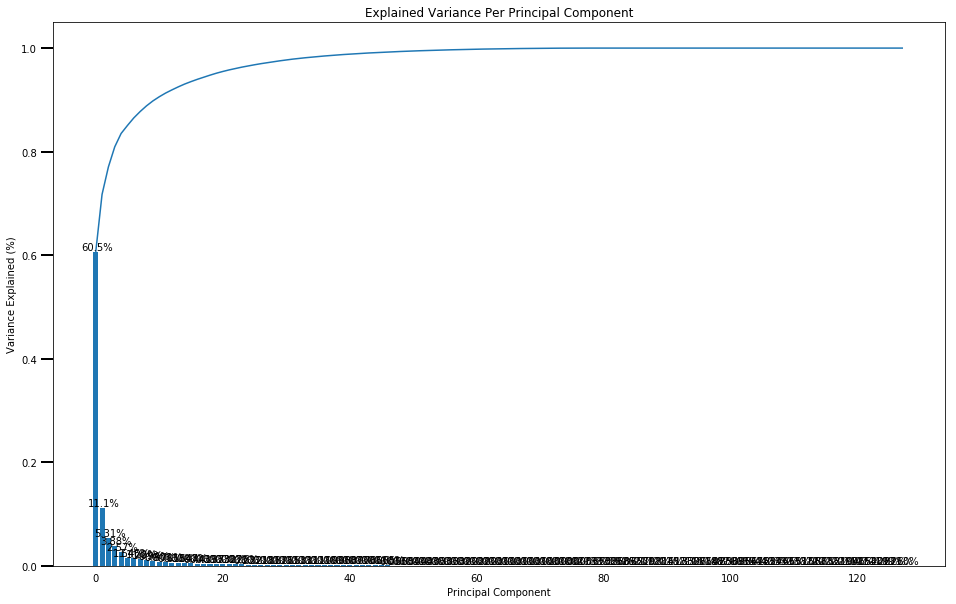

In [8]:
scree_plot(pca)

In [9]:
vals = pca.explained_variance_ratio_
cumvals = np.cumsum(vals)
for num,cumvals in enumerate(cumvals.tolist()):
    print("The num of components: "+str(num)+ ", The cumvals is: "+ str(cumvals))

The num of components: 0, The cumvals is: 0.6054467260876318
The num of components: 1, The cumvals is: 0.7173094335318965
The num of components: 2, The cumvals is: 0.7704450274537119
The num of components: 3, The cumvals is: 0.8092722317456056
The num of components: 4, The cumvals is: 0.8350267021366653
The num of components: 5, The cumvals is: 0.8505166668535181
The num of components: 6, The cumvals is: 0.8651383289757104
The num of components: 7, The cumvals is: 0.8774279776965384
The num of components: 8, The cumvals is: 0.888403424796809
The num of components: 9, The cumvals is: 0.8978806250054618
The num of components: 10, The cumvals is: 0.9059152251041024
The num of components: 11, The cumvals is: 0.9130679432690577
The num of components: 12, The cumvals is: 0.9192496706134897
The num of components: 13, The cumvals is: 0.925090547961817
The num of components: 14, The cumvals is: 0.9304989768668362
The num of components: 15, The cumvals is: 0.9352127040412532
The num of component

## Report
> As We can see only 10d data could represent 90% infomation

## Plot the data map to three-dimensional space

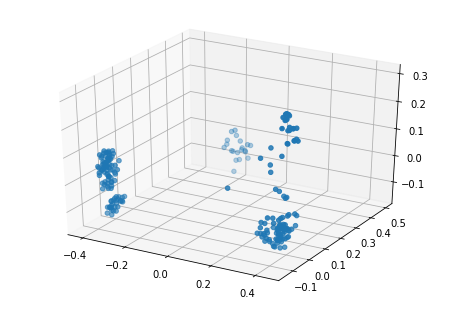

In [10]:
pca_new = PCA(3)
data_pca = pca_new.fit_transform(face_data)
data_pca_dataframe = pd.DataFrame(data_pca,columns = ['x','y','z'])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs=data_pca_dataframe['x'], ys=data_pca_dataframe['y'], zs=data_pca_dataframe['z']);

**It's hard to cluster these data by naked eye**

In [11]:
## Let's map data to two-dimensional space, and plot it

In [12]:
pca_new = PCA(2)
data_pca = pca_new.fit_transform(face_data)
data_pca_dataframe = pd.DataFrame(data_pca,columns = ['x','y'])

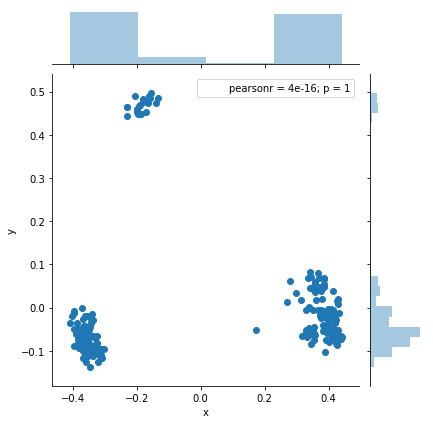

In [16]:
sns.jointplot(x='x',y='y',data =data_pca_dataframe);

**We can see there are 3 cluster easily**

##  Unsupervised learning algothrim comparion:
### 1 KMeans

In [17]:
from sklearn.cluster import KMeans

In [21]:
# Over a number of different cluster counts...

pca_new = PCA(15)
data_pca = pca_new.fit_transform(face_data)

cluster_number_list = list(range(10))
score_list = []
    # run k-means clustering on the data and...
for i in range(10):
    kmeans = KMeans(i+1)
    print("Do the KMeans with {0}".format(i+1))
    model =  kmeans.fit(data_pca)
    score_list.append(np.abs(model.score(data_pca)))    
    # compute the average within-cluster distances.

Do the KMeans with 1
Do the KMeans with 2
Do the KMeans with 3
Do the KMeans with 4
Do the KMeans with 5
Do the KMeans with 6
Do the KMeans with 7
Do the KMeans with 8
Do the KMeans with 9
Do the KMeans with 10


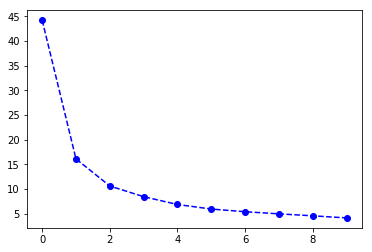

In [22]:
plt.plot(list(range(10)),score_list, linestyle='--', marker='o', color='b');

In [23]:
def show_weight_component(pca,num,co):
    df_pca = pd.DataFrame(pca.components_, columns=co)
    pc = df_pca.iloc[num].apply(lambda x:np.abs(x))
    return pc.sort_values(ascending=False)

In [24]:
def print_cluster_info(num,co):
    inverse_data = pd.Series(pca_new.inverse_transform(
                            clf.cluster_centers_[num]),
                            index = co)

    return inverse_data.apply(lambda x: np.abs(x)).sort_values(ascending = False)

In [25]:
cluster_num = 3
clf = KMeans(cluster_num)
pred_KMeans = clf.fit_predict(data_pca)

In [26]:
print_cluster_info(0,co).head()

76     0.389924
25     0.382252
113    0.295899
74     0.289069
43     0.261299
dtype: float64

In [27]:
print_cluster_info(1,co).head()

76     0.477398
25     0.291179
88     0.286894
105    0.276127
113    0.264443
dtype: float64

In [28]:
print_cluster_info(2,co).head()

76     0.381402
43     0.366995
112    0.277325
74     0.274446
25     0.260941
dtype: float64

In [29]:
# Plot result
def plot_result(X,pred):
    x1 = [n[0] for n in X]
    x2 = [n[1] for n in X]
    
    plt.scatter(x1,x2,c=pred,marker='x')
    plt.title("Result")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

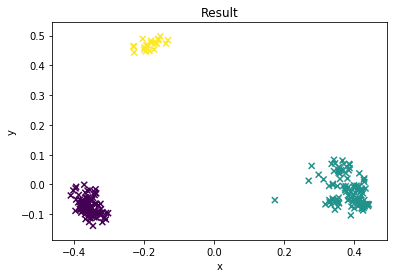

In [30]:
plot_result(data_pca,pred_KMeans)

In [31]:
def show_weight_component(pca,num):
    df_pca = pd.DataFrame(pca.components_)
    pc = df_pca.iloc[num].apply(lambda x:x)
    return pc.sort_values(ascending=False)

In [34]:
from sklearn import metrics
metrics.silhouette_score(data_pca, pred_KMeans, metric='euclidean')

0.59178648316747096

## 2 DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
eps_list = np.linspace(0.2,0.5,30)

In [37]:
for eps in eps_list:
    clt = DBSCAN(eps=eps,min_samples=2,metric = "euclidean")
    labels = clt.fit_predict(data_pca)
    cluster_number = len(set(labels))  
    print("Number of cluster : {}".format(cluster_number)) 

Number of cluster : 8
Number of cluster : 7
Number of cluster : 5
Number of cluster : 5
Number of cluster : 5
Number of cluster : 4
Number of cluster : 4
Number of cluster : 4
Number of cluster : 4
Number of cluster : 4
Number of cluster : 4
Number of cluster : 4
Number of cluster : 4
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3
Number of cluster : 3


In [41]:
clt = DBSCAN(eps=0.35,min_samples=2,metric = "euclidean")
pred_DBSCAN = clt.fit_predict(data_pca)

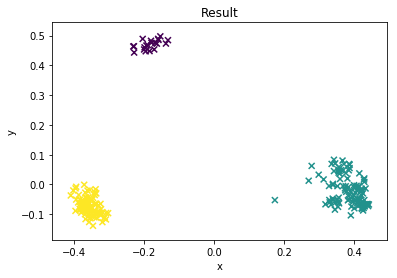

In [42]:
plot_result(data_pca,pred_DBSCAN)

In [43]:
metrics.silhouette_score(data_pca, pred_DBSCAN, metric='euclidean')

0.59178648316747096

In [ ]:
Here’s a list of advantages of KMeans and DBScan:

    KMeans is much faster than DBScan
    DBScan doesn’t need number of clusters

Here’s a list of disadvantages of KMeans and DBScan:

    
    DBScan doesn’t work well over clusters with different densities
    DBScan needs a careful selection of its parameters

## Result:

* KMeans : 
> * pro: KMeans is very simple to use, We can plot the elbow to identicy best number of cluster
> * con: K-means need the number of clusters hidden in the dataset
  
* DBSCAN :
> * pro: DBScan doesn’t need number of clusters
> * con: DBScan needs a careful selection of its parameters
          